In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/triggering_condition.csv', index_col = [0])

In [ ]:
data.head()

,type_relation,source,id,type_token,text
0,Condition triggering an action,token-cl383ekoq0002296ay0el2rh7,token-cl383ekoq0002296ay0el2rh7,time_sensitive_condition_event,demand
1,Condition triggering an action,token-cl4m204la000b356f9iya99hx,token-cl4m204la000b356f9iya99hx,time_sensitive_condition_phrase,"(i) if vesting occurs pursuant to Section 3(c),"
2,Condition triggering an action,token-cl3865jb600b4296aedo3b5q3,token-cl3865jb600b4296aedo3b5q3,triggering_condition_event,termination
3,Condition triggering an action,token-cl3865jb600b4296aedo3b5q3,token-cl3865jb600b4296aedo3b5q3,triggering_condition_event,termination
4,Condition triggering an action,token-cl3eqifet00n7296ajybkfwdf,token-cl3eqifet00n7296ajybkfwdf,triggering_condition_phrase,if vesting occurs pursuant to Section 3(b)


In [ ]:
conditions = data.text.values.tolist()

In [ ]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stopWords = set(stopwords.words('english'))
def clean_text(
    string: str, 
    punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~''',
    stop_words= stopWords):
    """
    A method to clean text 
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', string)
    string = re.sub('\xa0','', string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stop_words])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    return string    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
new_text = []
for text in conditions:
  text = clean_text(text)
  new_text.append(text)

In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 6.5 MB/s 
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 636 kB 50.4 MB/s 
     |████████████████████████████████| 5.2 MB 47.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 85 kB 4.5 MB/s 
     |████████████████████████████████| 5.5 MB 53.1 MB/s 
     |████████████████████████████████| 1.3 MB 61.2 MB/s 
     |████████████████████████████████| 182 kB 71.1 MB/s 
     |████████████████████████████████| 7.6 MB 57.5 MB/s 
     |████████████████████████████████| 1.1 MB 55.1 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340716 sha256=6830292c8fef4eceae49a7120029e517663af12c5a3717a4c785504cc60c47ea
  Stored in directory: /root/.cache

In [ ]:
!pip install bertopic[visualization]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from bertopic import BERTopic

In [ ]:
model = BERTopic(verbose=True)
 
topics, probabilities = model.fit_transform(new_text)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/27 [00:00<?, ?it/s]

2022-11-23 12:21:19,918 - BERTopic - Transformed documents to Embeddings
2022-11-23 12:21:32,779 - BERTopic - Reduced dimensionality
2022-11-23 12:21:32,838 - BERTopic - Clustered reduced embeddings


In [ ]:
model.get_topic_freq()

,Topic,Count
0,0,115
1,-1,108
2,1,93
3,2,85
4,3,34
5,4,33
6,5,32
7,6,28
8,7,26
9,8,25


In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_barchart()

In [ ]:
model.visualize_heatmap()

In [ ]:
model1 = BERTopic(nr_topics = 4)
topics, probabilities = model1.fit_transform(new_text)

2022-11-23 12:21:47,160 - BERTopic - Transformed documents to Embeddings
2022-11-23 12:21:53,168 - BERTopic - Reduced dimensionality
2022-11-23 12:21:53,217 - BERTopic - Clustered reduced embeddings
2022-11-23 12:21:54,089 - BERTopic - Reduced number of topics from 24 to 5


In [ ]:
model1.visualize_topics()

In [ ]:
model1.get_topic_freq()

,Topic,Count
0,-1,312
1,0,177
2,1,155
3,2,107
4,3,92


In [ ]:
model1.visualize_barchart()

In [ ]:
model1.visualize_heatmap()

In [ ]:
model2 = BERTopic(nr_topics = 5)
topics, probabilities = model2.fit_transform(new_text)

2022-11-23 12:22:06,740 - BERTopic - Transformed documents to Embeddings
2022-11-23 12:22:12,448 - BERTopic - Reduced dimensionality
2022-11-23 12:22:12,497 - BERTopic - Clustered reduced embeddings
2022-11-23 12:22:13,369 - BERTopic - Reduced number of topics from 22 to 6


In [ ]:
model2.visualize_topics()

In [ ]:
model2.get_topic_freq()

,Topic,Count
0,0,198
1,-1,167
2,1,164
3,2,152
4,3,85
5,4,77


In [ ]:
model2.visualize_barchart()

In [ ]:
model2.visualize_heatmap()

In [ ]:
model3 = BERTopic(nr_topics = 6)
topics, probabilities = model3.fit_transform(new_text)

2022-11-23 12:22:26,017 - BERTopic - Transformed documents to Embeddings
2022-11-23 12:22:31,576 - BERTopic - Reduced dimensionality
2022-11-23 12:22:31,633 - BERTopic - Clustered reduced embeddings
2022-11-23 12:22:32,662 - BERTopic - Reduced number of topics from 25 to 7


In [ ]:
model3.visualize_topics()

In [ ]:
model3.get_topic_freq()

,Topic,Count
0,-1,259
1,0,176
2,1,94
3,2,92
4,3,85
5,4,81
6,5,56


In [ ]:
model3.visualize_barchart()

In [ ]:
model3.visualize_heatmap()

In [ ]:
for i in range(6):
  print(model3.get_topic(i))

[('obligations', 0.09402456508634299), ('full', 0.07512592141612584), ('payment', 0.070605899068906), ('loan', 0.059419918859557004), ('terminated', 0.057530732574664144), ('paid', 0.053849309146333235), ('agent', 0.053477926973601306), ('credit', 0.05196684220180199), ('lender', 0.04849631184949843), ('secured', 0.045663233974841864)]
[('termination', 0.36773528263173205), ('date', 0.25537172404981395), ('effective', 0.13245897604916518), ('event', 0.10992099111367563), ('vesting', 0.07401710899696037), ('qualifying', 0.0689882254155742), ('management', 0.0689882254155742), ('earlier', 0.05906428974038782), ('upon', 0.04705900347976124), ('prior', 0.04689448123254074)]
[('employment', 0.23162266598568995), ('executives', 0.13773158247116513), ('reason', 0.12087989057435813), ('termination', 0.11702795864803257), ('terminates', 0.1029923410015993), ('upon', 0.08557738403302645), ('company', 0.0822148315676835), ('death', 0.07750246615544513), ('participants', 0.07750246615544513), ('ex

In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
sentence_embeddings = model.encode(new_text)

In [ ]:
sentence_embeddings

array([[-0.0720269 ,  0.01158525, -0.00867766, ..., -0.04557379,
         0.00587861,  0.03848633],
       [-0.06587458, -0.03989237, -0.02299681, ..., -0.03879945,
        -0.05843231,  0.00186351],
       [-0.02428256,  0.09826826,  0.07237934, ..., -0.01054963,
         0.07353503, -0.01659826],
       ...,
       [-0.1027746 , -0.01611271,  0.03968007, ..., -0.05409745,
         0.14153479, -0.04691821],
       [-0.01153216,  0.0172892 ,  0.1085997 , ...,  0.02907173,
         0.01573974, -0.04628485],
       [ 0.00893542,  0.02727326,  0.09366939, ...,  0.00214484,
         0.08372761,  0.01211308]], dtype=float32)

In [ ]:
from sklearn.cluster import KMeans
wcss = []

In [ ]:
!pip3 install libopenblas-dev


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement libopenblas-dev (from versions: none)
ERROR: No matching distribution found for libopenblas-dev


In [ ]:
kmeans = KMeans(n_clusters= 6)
kmeans.fit(sentence_embeddings)

KMeans(n_clusters=6)

In [ ]:
label = kmeans.fit_predict(sentence_embeddings)
print(label)

[0 2 3 3 2 1 0 1 2 0 4 2 2 1 0 3 0 2 4 4 1 1 4 2 2 3 2 0 2 2 0 2 0 2 2 2 2
 1 0 0 0 2 0 0 4 0 1 0 2 0 0 4 1 1 0 0 0 2 0 4 0 0 2 2 2 1 0 4 4 4 1 0 1 1
 3 2 0 1 1 2 4 4 2 1 2 2 0 2 2 4 2 3 0 0 1 0 0 0 0 2 2 2 0 1 0 0 4 4 2 4 1
 2 4 4 2 2 2 3 2 0 5 2 0 5 3 2 4 2 4 4 4 1 3 2 2 3 3 2 2 2 2 2 4 5 3 1 3 5
 2 1 4 3 5 4 5 3 1 3 4 1 5 3 2 2 2 2 2 2 5 2 1 1 1 0 0 5 0 4 4 3 3 3 2 4 2
 2 2 0 0 4 2 3 2 0 0 2 1 1 2 5 2 2 2 2 2 3 3 0 3 1 1 1 2 4 2 2 2 5 0 0 4 3
 0 2 4 0 0 2 0 3 5 1 2 3 2 3 5 3 4 4 3 2 2 4 3 1 1 2 3 5 2 1 4 0 3 2 2 2 2
 2 5 5 3 3 5 5 2 1 2 0 1 1 3 3 5 5 3 2 1 3 0 2 2 2 3 3 5 3 1 1 1 1 3 3 3 1
 1 3 0 0 1 5 2 2 0 2 5 1 4 2 1 3 1 3 4 4 3 0 2 2 0 3 3 0 0 0 0 2 1 2 2 1 4
 2 1 2 4 0 5 5 2 5 2 0 3 3 3 0 1 3 3 3 4 3 4 0 3 0 2 3 3 2 3 3 1 1 1 4 4 3
 2 5 2 0 2 0 2 0 2 1 3 0 0 0 0 3 4 0 0 0 1 0 2 4 3 2 2 0 2 2 4 2 2 2 2 2 1
 3 2 3 0 0 2 0 0 0 2 2 0 0 0 4 2 1 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 2 0 1
 0 4 2 0 0 2 1 0 3 2 1 4 4 0 2 2 1 0 3 4 4 2 4 0 2 2 2 2 2 1 0 2 0 0 1 1 0
 1 0 1 0 2 2 2 2 1 2 3 3 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

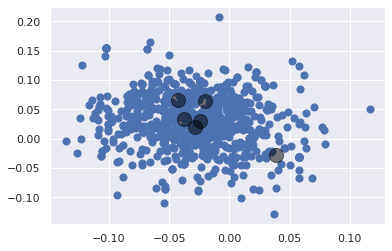

In [ ]:
plt.scatter(sentence_embeddings[:, 0], sentence_embeddings[:, 1], s=50, cmap='Perceptually Uniform Sequential')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
df = pd.read_csv('data.csv', index_col = [0])

In [ ]:
test_conditions = df.Condition.values.tolist()

In [ ]:
new_conditions = []
for text in test_conditions:
  text = clean_text(text)
  new_conditions.append(text)

In [ ]:
new_conditions = list(set(new_conditions))
new_text = list(set(new_text))

In [ ]:
embedding1 = model.encode(new_text, convert_to_tensor=True)

In [ ]:
highest_scores = {}
Risk_measure = []
similar_sentence = []
for condition in new_conditions:
  if len(condition) >= 5:
    dic = {}
    condition_embedding = model.encode(condition, convert_to_tensor=True)
    # top_k results to return
    top_k= 1
    # compute similarity scores of the sentence with the corpus
    cos_scores = util.pytorch_cos_sim(condition_embedding, embedding1)[0]
    maximum = max(cos_scores.numpy())
    # Sort the results in decreasing order and get the first top_k
    top_results = np.argpartition(-cos_scores, range(top_k))[0]
    similar_sentence.append(new_text[top_results])
    if maximum > 1:
      maximum = 1.00
    highest_scores[condition] = maximum
    if maximum < 0.5:
      Risk_measure.append('High')
    elif 0.5 <= maximum <= 0.7:
      Risk_measure.append('Medium')
    else:
      Risk_measure.append('Low')

In [ ]:
print(highest_scores)

{'written demand therefor': 0.86859345, 'upon execution agreement': 0.68133414, 'event litigation parties respecting arising agreement': 0.64279205, 'upon exercise sar': 0.49852931, 'receipt reasonably detailed invoice therefor': 0.75445515, 'event termination agreement provided section 91': 0.78297675, 'executive’s employment terminated reason executive’s death employment period': 1.0, 'whenever payment made hereunder shall stated due day business day due without prior notice consent company': 0.82525206, 'issues cannot resolved mediation process': 0.46195722, 'section xa025 upon reduction revolving commitments unless otherwise permitted section xa025 connection termination reduction portion revolving credit facility pursuant section xa025': 0.6576249, 'executive’s employment employer expires terminated whether employer executive reason term': 0.8394172, 'provided exists default upon notice administrative agent shall promptly notify lenders time sending notice': 0.80649865, 'provided 

In [ ]:
d = {'sentences': highest_scores.keys(), 'most_similar_sentence':similar_sentence,'similarity_scores': highest_scores.values(), 'Risk_measurement' : Risk_measure}
comparision = pd.DataFrame(data = d)

In [ ]:
comparision.iloc[73:75]

,sentences,most_similar_sentence,similarity_scores,Risk_measurement
73,proceeding shall brought asserted person entit...,proceeding shall brought asserted person entit...,1.000000,Low
74,within ten 10 business days following receipt ...,provided company opportunity cure within thirt...,0.496333,High


In [ ]:
comparision

,sentences,most_similar_sentence,similarity_scores,Risk_measurement
0,written demand therefor,written demand,0.868593,Low
1,upon execution agreement,upon termination agreement,0.681334,Medium
2,event litigation parties respecting arising ag...,unless settlement compromise consent includes ...,0.642792,Medium
3,upon exercise sar,exercise,0.498529,High
4,receipt reasonably detailed invoice therefor,receipt,0.754455,Low
...,...,...,...,...
102,determined board contained award agreement,unless participant prior grant award submitted...,0.553247,Medium
103,successful transfer class epitope data,transfer cannot accomplished,0.391151,High
104,time debenture outstanding company shall decla...,time debenture outstanding company shall decla...,0.996403,Low
105,event sale shares consummated reason,upon occurrence insolvency event respect seller,0.478113,High
